# Spam_SMS_email_Classifier 
##### -Mayank Srivastava
- <small>[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-blue?style=for-the-badge&logo=linkedin)](https://linkedin.com/in/mayank-srivastava-6a8421105/)</small>
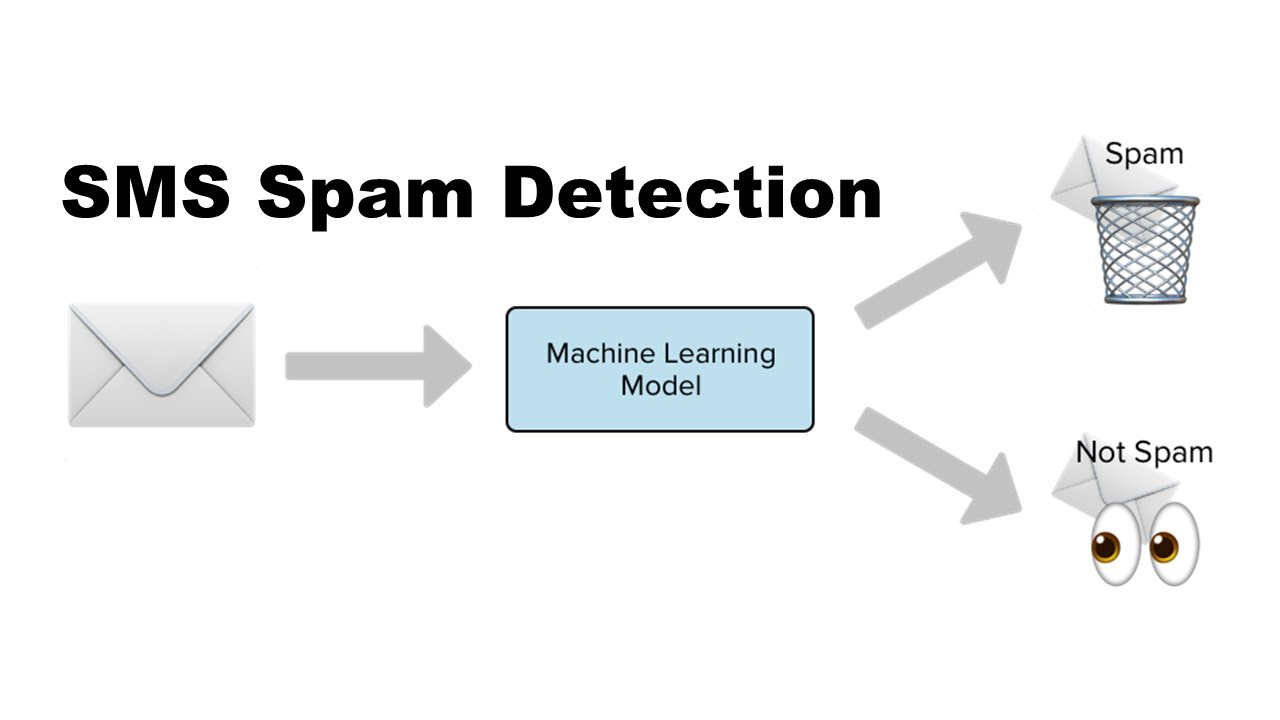

Dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

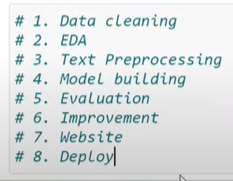

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


    Observations:

    - No Null values
    - size  = 5572 x 4

## 1. Data Cleaning

In [4]:
# Dropping the extra columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

#renaming the columns
df.rename(columns ={'v1': 'label', 'v2': 'text'}, inplace = True)

# replacing ham ->0 , spam -> 1
df.label.replace(['ham','spam'],[0,1], inplace = True)

df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# checking for dupplicates

df.duplicated().sum()

403

In [6]:
# removing duplicates
df =df[~df.duplicated()]
df.shape

(5169, 2)

In [7]:
5572-403

5169

## 2. EDA

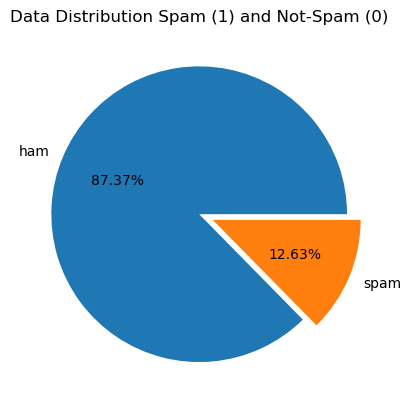

label
0    4516
1     653
Name: count, dtype: int64

In [8]:
data= df.label.value_counts()
plt.pie(data.values, labels=['ham', 'spam'], autopct ="%1.2f%%", explode = [0.0,0.1])
plt.title('Data Distribution Spam (1) and Not-Spam (0)')
plt.show()
data

>**Feature Engineering**

In [9]:
# lets find no. of characters, words and sentences in spam and ham
import nltk
from nltk import word_tokenize,sent_tokenize

df['n_chars'] = df.text.str.len()
df['n_words'] =df.text.apply(lambda x: len(word_tokenize(x)))
df['n_sent'] =df.text.apply(lambda x: len(sent_tokenize(x)))
df.head()

,label,text,n_chars,n_words,n_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='n_chars', ylabel='Count'>

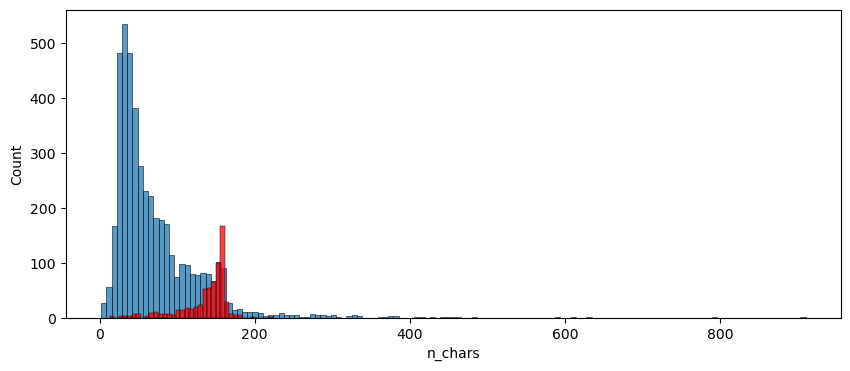

In [10]:
# plotting spam vs ham based on no. of characters
plt.figure(figsize =(10,4))
sns.histplot(df[df.label == 0]['n_chars'])
sns.histplot(df[df.label == 1]['n_chars'], color= 'red')

    Observation: Spam text has generally higher character count than ham

<Axes: xlabel='n_words', ylabel='Count'>

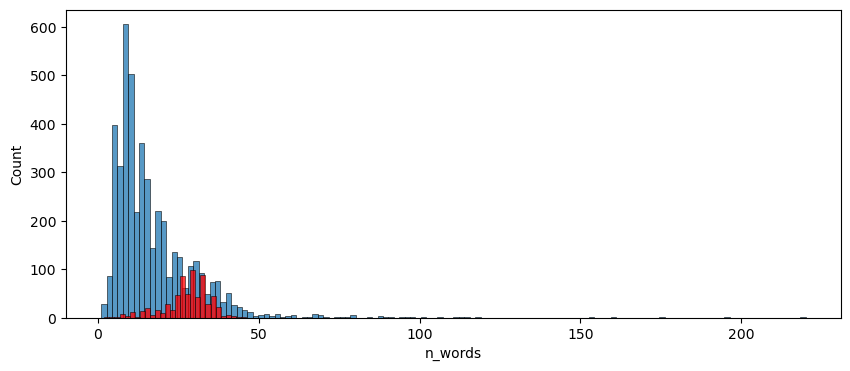

In [11]:
# plotting spam vs ham based on no. of words
plt.figure(figsize =(10,4))
sns.histplot(df[df.label == 0]['n_words'])
sns.histplot(df[df.label == 1]['n_words'], color= 'red')

    Observation: Spam text has generally higher word count than ham

In [12]:
df.groupby('label')[['n_chars','n_words','n_sent']].mean().transpose().rename(columns ={0:'ham', 1:'spam'})

label,ham,spam
n_chars,70.459256,137.891271
n_words,17.123782,27.667688
n_sent,1.820195,2.970904


    Observation- On an average:
         - ham text has avg 70 characters while spam has almost double characters.
         - ham text has 17 words, spam has 27 words
         - ham has ~ 2 sentences, spam has ~3 sentences.

## 3. Text preprocessing

In [13]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# lets define a helper fuction for standardization of text

In [15]:
# remove punctuations
import string
punctuation= string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
# stop words
from nltk.corpus import stopwords
stops= set(stopwords.words('english'))
stops 

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [17]:
import re
stem =PorterStemmer()
lemm = WordNetLemmatizer()
def standardize(text):
    
    # change to lower case
    text = text.lower()
    
    # keep only alpha numerics 
    # assuming _ sign is used for space in text, replacing it with space
    text =re.sub('_','',text)
    text =re.findall(r"\w+", text)
    
    # now text has been converted into list of words , after re.findall
    
    # remove punctuations and stopwords
    text =[i for i in text if i not in stops and i not in punctuation]
        
    # lemmatization
    text= [lemm.lemmatize(i) for i in text]
    
    # stemming
    text= [stem.stem(i) for i in text]
    
    return(' '.join(text))

In [18]:
standardize("Hello' there I am peter, from22nd_street the mayor's office, who__ are. you? Dear %. Dancing ate remotely")

'hello peter from22ndstreet mayor offic dear danc ate remot'

In [19]:
df['std_text'] = df.text.apply(standardize)
df.std_text

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                     nah think go usf life around though
                              ...                        
5567    2nd time tri 2 contact u u å 750 pound prize 2...
5568                              ì b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: std_text, Length: 5169, dtype: object

In [20]:
# pip install wordcloud

In [21]:
# word_cloud of spam messages
from wordcloud import WordCloud
wc= WordCloud(width =720, height =720, min_font_size =10, background_color ='white')

In [22]:
spam_wc = wc.generate(df[df.label == 1]['std_text'].astype('str').str.cat(sep= " "))
# concatentaing texts with seperator space

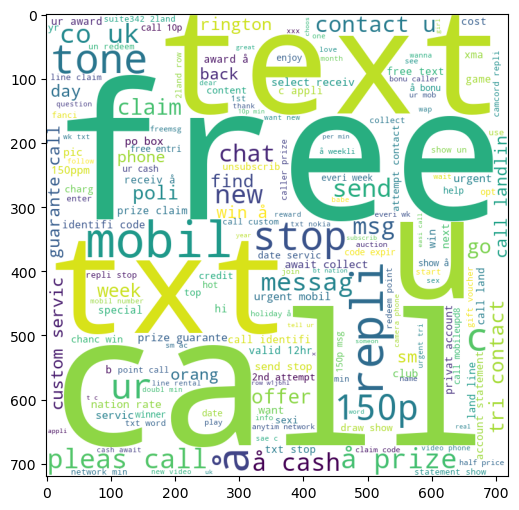

In [23]:
plt.figure(figsize =(8,6))
plt.imshow(spam_wc)

In [24]:
ham_wc = wc.generate(df[df.label == 0]['std_text'].astype('str').str.cat(sep= " "))
# concatentaing texts with seperator space

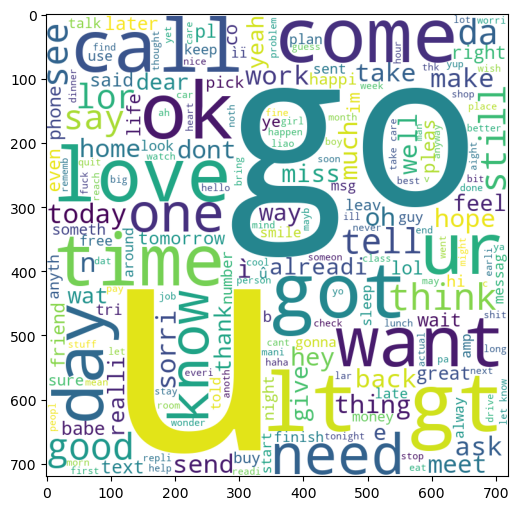

In [25]:
plt.figure(figsize =(8,6))
plt.imshow(ham_wc)

In [26]:
df[df.label == 1]['std_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea å 9...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 20 000 pound txt csh11 ...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get 2 50 pound free call credit deta...
5567    2nd time tri 2 contact u u å 750 pound prize 2...
Name: std_text, Length: 653, dtype: object

In [27]:
# Top 30 words in spam,
# made a single list, used value_counts
spam_words =[]
for i in df[df.label == 1]['std_text'].str.split(' '):
    spam_words+=i
print(spam_words)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'å', '1', '50', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'å', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', '20', '000', 'pound', 'txt', 'csh11', 'send', '87575', 'cost', '150p', 'day', '6day', '16', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'å', '100', '000', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'www', 'dbuk', 'net',

In [28]:
len(spam_words)

11996

In [29]:
from collections import Counter
spam_count =Counter(spam_words)
spam_count.most_common(30)

[('call', 327),
 ('å', 247),
 ('free', 195),
 ('2', 184),
 ('u', 155),
 ('txt', 145),
 ('text', 128),
 ('ur', 119),
 ('mobil', 118),
 ('4', 114),
 ('stop', 109),
 ('repli', 103),
 ('claim', 98),
 ('1', 93),
 ('c', 87),
 ('prize', 83),
 ('www', 83),
 ('get', 75),
 ('min', 71),
 ('tone', 70),
 ('cash', 65),
 ('servic', 65),
 ('150p', 64),
 ('new', 64),
 ('uk', 63),
 ('send', 61),
 ('nokia', 59),
 ('urgent', 58),
 ('msg', 58),
 ('contact', 56)]

In [30]:
pd.DataFrame(spam_count.most_common(30))

,0,1
0,call,327
1,å,247
2,free,195
3,2,184
4,u,155
5,txt,145
6,text,128
7,ur,119
8,mobil,118
9,4,114


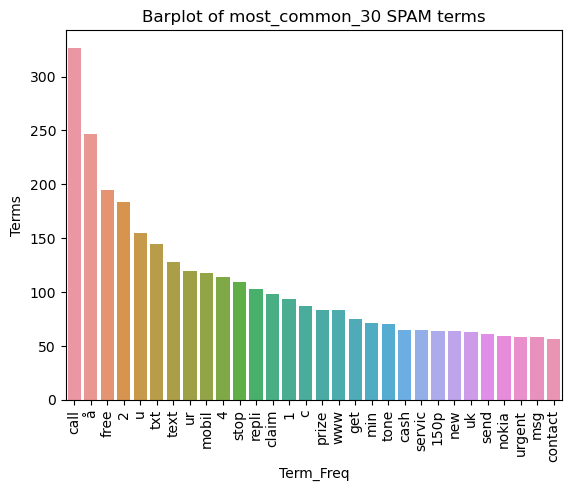

In [31]:
sns.barplot(x= pd.DataFrame(spam_count.most_common(30))[0],y= pd.DataFrame(spam_count.most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.xlabel('Term_Freq')
plt.ylabel('Terms')
plt.title('Barplot of most_common_30 SPAM terms')
plt.show()

In [32]:
# similarly for ham_words
ham_words = []
for i in df[df.label == 0]['std_text'].str.split():
    ham_words+=i
print(ham_words)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'go', 'usf', 'life', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gonna', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'û', 'go', 'tri', '2', 'month'

In [33]:
len(ham_words)

36505

In [34]:
from collections import Counter
ham_count =Counter(ham_words)
ham_count.most_common(30)

[('u', 969),
 ('go', 432),
 ('get', 354),
 ('2', 302),
 ('gt', 288),
 ('lt', 287),
 ('come', 276),
 ('ok', 255),
 ('call', 240),
 ('like', 236),
 ('know', 236),
 ('got', 226),
 ('love', 225),
 ('time', 223),
 ('good', 216),
 ('day', 210),
 ('want', 209),
 ('ur', 198),
 ('need', 174),
 ('4', 171),
 ('one', 165),
 ('lor', 159),
 ('home', 156),
 ('think', 150),
 ('take', 148),
 ('see', 147),
 ('still', 145),
 ('da', 143),
 ('k', 138),
 ('tell', 134)]

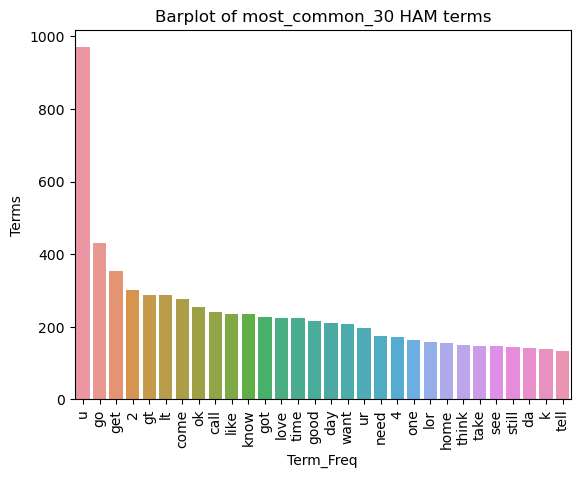

In [35]:
sns.barplot(x= pd.DataFrame(ham_count.most_common(30))[0],y= pd.DataFrame(ham_count.most_common(30))[1])
plt.xticks(rotation ='vertical')
plt.xlabel('Term_Freq')
plt.ylabel('Terms')
plt.title('Barplot of most_common_30 HAM terms')
plt.show()

## 4. Text Vectorization

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer(stop_words = 'english')
tv= TfidfVectorizer(stop_words = 'english')

X_cv= cv.fit_transform(df.std_text).toarray()
X_tv= tv.fit_transform(df.std_text).toarray()

In [37]:
X_cv.shape, X_tv.shape

((5169, 7059), (5169, 7059))

- Both the vectorization methods give text vetors of same length

In [38]:
y=df.label

In [39]:
#Tf-idf  vectorization
from sklearn.model_selection import cross_val_score, train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(X_tv, y, test_size =0.2, random_state =42)

## 5. Model Builidng

- Which is Better for Spam Detection?
    - If minimizing false positives is critical (i.e., you don't want to risk important emails being marked as spam), precision is more important. 
    - This is often the case in professional or business environments where missing an important email can have serious consequences.

    - If minimizing false negatives is critical (i.e., you want to ensure that most spam emails are correctly identified), recall is more important. 
    - This is often the case in personal email use where receiving spam emails is more of an annoyance than missing an important email.

In [40]:
# to check names of scorers for cross-val
# import sklearn
# sklearn.metrics.get_scorer_names()

In [41]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score, train_test_split
gnb= GaussianNB()
mnb=MultinomialNB()
bnb =BernoulliNB()

In [42]:
X={'BoW':X_cv, 'Tf-Idf':X_tv}
model={'GaussianNB':gnb,'MultinomialNB':mnb,'BernoulliNB':bnb}

In [43]:
scores={}
for i in X:
    for j in model:
        scores[i+'_'+j] = np.max(cross_val_score(model[j], X[i], y, cv=5, scoring ='precision'))
        
# our metric is recall score because, we dont want any false positives (Type 2 error), ie a Spam predicted as Ham

In [44]:
scores

{'BoW_GaussianNB': 0.5041322314049587,
 'BoW_MultinomialNB': 0.9333333333333333,
 'BoW_BernoulliNB': 1.0,
 'Tf-Idf_GaussianNB': 0.497907949790795,
 'Tf-Idf_MultinomialNB': 1.0,
 'Tf-Idf_BernoulliNB': 1.0}

In [45]:
sorted(scores.items(), key=lambda x: x[1], reverse = True)

[('BoW_BernoulliNB', 1.0),
 ('Tf-Idf_MultinomialNB', 1.0),
 ('Tf-Idf_BernoulliNB', 1.0),
 ('BoW_MultinomialNB', 0.9333333333333333),
 ('BoW_GaussianNB', 0.5041322314049587),
 ('Tf-Idf_GaussianNB', 0.497907949790795)]

- Clearly the winner is BoW with Multinomial Naive Bayes with the best f1_score

In [46]:
# training the model on 'BoW_BernoulliNB' or 'Tf-Idf_MultinomialNB' or 'Tf-Idf_BernoulliNB' is giving ideal Precision

# randomly proceeding with Tf-Idf_MultinomialNB
xtrain, xtest, ytrain, ytest =train_test_split(X_tv, y, test_size =0.2, random_state =42)
mnb.fit(xtrain, ytrain)

MultinomialNB()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
pred_train =mnb.predict(xtrain)
pred_test =mnb.predict(xtest)
print('training accuracy_score: ', accuracy_score(ytrain, pred_train))
print('training precision_score: ', precision_score(ytrain, pred_train))
print('training confusion_matrix: \n', confusion_matrix(ytrain, pred_train))

#predicting testing data
print('testing accuracy_score: ', accuracy_score(ytest, pred_test))
print('testing precision_score: ', precision_score(ytest, pred_test))
print('testing confusion_matrix: \n', confusion_matrix(ytest, pred_test))

training accuracy_score:  0.9743651753325272
training precision_score:  1.0
training confusion_matrix: 
 [[3627    0]
 [ 106  402]]
testing accuracy_score:  0.9661508704061895
testing precision_score:  1.0
testing confusion_matrix: 
 [[889   0]
 [ 35 110]]


In [48]:
# 'Tf-Idf_BernoulliNB'
xtrain, xtest, ytrain, ytest =train_test_split(X_tv, y, test_size =0.2, random_state =42)
bnb.fit(xtrain, ytrain)
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
pred_train =bnb.predict(xtrain)
pred_test =bnb.predict(xtest)
print('training accuracy_score: ', accuracy_score(ytrain, pred_train))
print('training precision_score: ', precision_score(ytrain, pred_train))
print('training confusion_matrix: \n', confusion_matrix(ytrain, pred_train))

#predicting testing data
print('testing accuracy_score: ', accuracy_score(ytest, pred_test))
print('testing precision_score: ', precision_score(ytest, pred_test))
print('testing confusion_matrix: \n', confusion_matrix(ytest, pred_test))

training accuracy_score:  0.9835550181378476
training precision_score:  0.9932735426008968
training confusion_matrix: 
 [[3624    3]
 [  65  443]]
testing accuracy_score:  0.971953578336557
testing precision_score:  0.967741935483871
testing confusion_matrix: 
 [[885   4]
 [ 25 120]]


In [49]:
# 'BoW_BernoulliNB'
xtrain, xtest, ytrain, ytest =train_test_split(X_cv, y, test_size =0.2, random_state =42)
bnb.fit(xtrain, ytrain)
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
pred_train =bnb.predict(xtrain)
pred_test =bnb.predict(xtest)
print('training accuracy_score: ', accuracy_score(ytrain, pred_train))
print('training precision_score: ', precision_score(ytrain, pred_train))
print('training confusion_matrix: \n', confusion_matrix(ytrain, pred_train))

#predicting testing data
print('testing accuracy_score: ', accuracy_score(ytest, pred_test))
print('testing precision_score: ', precision_score(ytest, pred_test))
print('testing confusion_matrix: \n', confusion_matrix(ytest, pred_test))

training accuracy_score:  0.9835550181378476
training precision_score:  0.9932735426008968
training confusion_matrix: 
 [[3624    3]
 [  65  443]]
testing accuracy_score:  0.971953578336557
testing precision_score:  0.967741935483871
testing confusion_matrix: 
 [[885   4]
 [ 25 120]]


- Since for a Business case **'precision'** is more important than **'accuracy'** for a Spam classifier, we will go ahead with **Tf-Idf-MultinomialNB.**
- Achieved Precision: 1.0
- Accuracy 0.9661508704061895

## 6. Model Improvement

>**Trying other ML classifer algorithm**

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [51]:
lr=LogisticRegression()
svc =SVC()
mnb=MultinomialNB()
dt= DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf= RandomForestClassifier()
ada= AdaBoostClassifier()
bg=BaggingClassifier()
etc= ExtraTreesClassifier()
gb= GradientBoostingClassifier()
xgb= XGBClassifier()

In [52]:
models ={'LR': lr, 'SVC' :svc, 'MultNB':mnb, 'DT':dt, "KNN":knn,"RF":rf, "ADA":ada,"BgC":bg,"ETC":etc,"GB":gb,"XGB":xgb}

In [53]:
xtrain, xtest, ytrain, ytest =train_test_split(X_tv, y, test_size =0.2, random_state =42)

def training_model(model, xtrain, xtest, ytrain, ytest):
    model.fit(xtrain,ytrain)
    pred= model.predict(xtest)
    accuracy =accuracy_score(ytest,pred)
    precision =precision_score(ytest,pred)
    
    return accuracy, precision

In [54]:
accuracy=[]
precision =[]
for i in models:
    a,p=training_model(models[i],xtrain, xtest, ytrain, ytest)
    accuracy.append(a)
    precision.append(p)

In [55]:
final =pd.DataFrame({'Classifier' : models.keys(), 'Accuracy': accuracy, 'Precision': precision})
final.sort_values(by='Precision', ascending =False)

,Classifier,Accuracy,Precision
2,MultNB,0.966151,1.000000
4,KNN,0.890716,1.000000
8,ETC,0.979691,0.992063
5,RF,0.977756,0.991935
1,SVC,0.970986,0.991453
9,GB,0.965184,0.990991
0,LR,0.954545,0.980392
10,XGB,0.972921,0.953488
6,ADA,0.974855,0.940741
7,BgC,0.967118,0.930233


>**Hypertuning the best model**

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

In [58]:
# hypertuning the TF-IDF -> MNB model

# Define a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Define the parameter grid
param_grid = {
    'tfidf__max_df': [0.5, 0.75,1.0],
    'tfidf__min_df': [1, 2, 5],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.01, 0.1, 1, 10]
}

# 'tfidf__max_df': Maximum document frequency (proportion of documents in which a term appears).
# 'tfidf__min_df': Minimum document frequency (minimum number of documents a term must be in).
# 'tfidf__ngram_range': The lower and upper boundary of the range of n-values for different n-grams to be extracted.
# 'nb__alpha': Smoothing parameter for the Naive Bayes classifier.

# Define the scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score)
}
# Perform GridSearchCV
gv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring = scoring, refit='accuracy')

# Fit the model
xtrain, xtest, ytrain, ytest =train_test_split(df.std_text.astype('str'), y, test_size =0.2, random_state =42)
gv.fit(xtrain, ytrain)

# Print best parameters and best score
print("Best parameters found: ", gv.best_params_)
print("Best accuracy_score: ", gv.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}
Best accuracy_score:  0.9842805320435308


In [59]:
# precision, accuracy
precision_score(ytest,gv.predict(xtest)), accuracy_score(ytest,gv.predict(xtest))

(0.9692307692307692, 0.9777562862669246)

- the accuracy has improved from 0.0.9661508704061895 to 0.9777562862669246 , but precison has dropped from 1.0 to 0.9692307692307692
- this tradeoff is not desirable as precision holds greater significance for business use in a spam classifier
- so we will keep things unchanged an procced with the **TF-IDF-> MNB** as our final model 

In [60]:
X_tv= tv.fit_transform(df.std_text).toarray()
xtrain, xtest, ytrain, ytest =train_test_split(X_tv, y, test_size =0.2, random_state =42)
mnb.fit(xtrain, ytrain)
pred_train =mnb.predict(xtrain)
pred_test =mnb.predict(xtest)
print('testing accuracy_score: ', accuracy_score(ytest, pred_test))
print('testing precision_score: ', precision_score(ytest, pred_test))
print('testing confusion_matrix: \n', confusion_matrix(ytest, pred_test))

testing accuracy_score:  0.9661508704061895
testing precision_score:  1.0
testing confusion_matrix: 
 [[889   0]
 [ 35 110]]


## 7. Pickle

In [61]:
import pickle
pickle.dump(mnb, open('model.pkl', 'wb'))
pickle.dump(tv, open('vectorizer.pkl', 'wb'))
pickle.dump(standardize, open('standardize.pkl','wb'))

In [62]:
xtest[9].shape

(7059,)

In [63]:
xtest[0].reshape(1, -1).shape

(1, 7059)

In [64]:
mnb.predict(xtest[5].reshape(1, -1)), ytest.iloc[5]

(array([1], dtype=int64), 1)

In [65]:
mnb.predict(xtest[5].reshape(1, -1))[0]

1

In [66]:
t= """We’re happy to inform you that you’re entitled to a refund for overpayment on your AMEX account. Click on this link [Link] below to claim your refund."""

In [67]:
standardize(t)

'happi inform entitl refund overpay amex account click link link claim refund'

In [68]:
tv.transform([standardize(t)]).shape

(1, 7059)

In [69]:
mnb.predict(tv.transform([standardize(t)]))

array([0], dtype=int64)

In [70]:
mnb.predict_proba(tv.transform([standardize(t)])).max()

0.6703360228456645